<a href="https://colab.research.google.com/github/hws1302/partII-computing-exercises/blob/main/exercise1_hs723_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: The Driven Pendulum (hs723)

$$\frac{d^2 \theta}{d t^2} = -\frac{g}{l}\sin (\theta) - q \frac{dθ}{dt} + F \sin (\Omega_d t)$$

In this exercise we take $g=l$ and $\Omega_d = 2/3 s^{-1}$

Making for a natural period for small osciallations of $2\pi$ seconds.

##Core task 1 
- Energy conservation plot 
- Period vs. amplitude plot
- Values at $\pi/2$

In [ ]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

### Re-writing the ODE

we define the new variables 
$$ y_0 = \theta, y_1 = \dot{\theta} $$

which give us two coupled ODEs

$$\dot{y_0} = y_1$$
$$\dot{y_1} = - \sin{y_0} - qy_1 + F\sin{(\frac{2t}{3})}$$

We can write a function that gives us the derivatives of $y_0$ and $y_1$

In [ ]:
def derivatives(t: np.ndarray, y: tuple, q: float, F: float):
    """
    Return the values of the derivatives the two variables

              Parameters:
                      derivatives (function): the function returning derivatives for given t, y[0], y[1]
                      n_oscillations (int): number of oscillations of natural frequency to solve
                      theta0 (float): starting amplitude
                      q (float): drag coefficient
                      F (float): forcing coefficient

              Returns:
                      dy0dt (float): value of y0' for given t, y0, y1
                      dy1dt (float): value of y1' for given t, y0, y1
    """
    return [y[1], -np.sin(y[0]) - q * y[1] + F * np.sin(2 * t / 3)]

We can also define a function that evaluates the problem for some given number of oscillations, sampling 100x per oscillation 

Outputting a timeseries with $y_0$ and $y_1$ values

In [ ]:
def integrate_pendulum(
    n_oscillations: int,
    theta0: float,
    q: float,
    F: float,
    samples_per_oscillation: int = 100,
):
    """
    Returns the solutions to given coupled ODEs

            Parameters:
                    derivatives (function): the function returning derivatives for given t, y[0], y[1]
                    n_oscillations (int): number of oscillations of natural frequency to solve
                    theta0 (float): starting amplitude
                    q (float): drag coefficient
                    F (float): forcing coefficient

            Returns:
                    time (numpy.ndarray): time series of integration
                    y0 (numpy.ndarray): value of y0 over time series
                    y1 (numpy.ndarray): value of y1 over time series
    """

    solution = scipy.integrate.solve_ivp(
        fun=derivatives,
        t_span=(0, n_oscillations * 2 * np.pi),
        y0=(theta0, 0),
        args=(q, F),
        t_eval=np.linspace(
            0, n_oscillations * 2 * np.pi, samples_per_oscillation * n_oscillations
        ),  # 100 sample per oscillation
    )

    return solution.t, solution.y[0], solution.y[1]

### Conservation of energy

We know in the real world energy is conserved, so it can be a good measure of how good our solution is by seeing the change in total energy which is the sum of kinetic and potential energies:

$$E_{tot} = \frac{1}{2}m{v}^2 + mgh$$

$$E_{tot} = ml^2 (\frac{1}{2}\dot{\theta}^2 + 1 - \cos(\theta))$$

Using $g = l$ we can factor out to 

$$E_{tot} = ml^2 (\frac{1}{2}y_1^2 + 1 - \cos(y_0))$$

We know the starting energy is given by:

$$E_0 = E_{tot}(t=0) = ml^2(1 - \cos\theta_0)$$

Therefore, we can plot the ratio:

$$\frac{E_{tot}}{E_0} = \frac{\frac{1}{2}y_1^2 + 1 - \cos(y_0)}{1 - \cos y_0(t = 0)}$$


Remembering that $y_0(t = 0) = \theta_0$

Lets look at how the energy changes for 10000 oscillations:

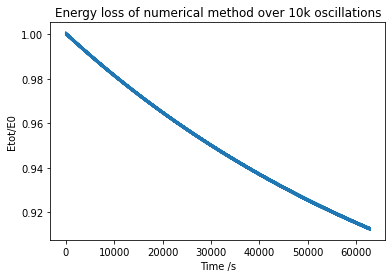

In [ ]:
# defining our variables, we choose 10000 oscillations as we expect energy to change slowly
n_oscillations, theta0, q, F = 10000, 0.01, 0, 0

# finding the numerical solution
t, y0, y1 = integrate_pendulum(n_oscillations, theta0, q, F)

E0 = 1 - np.cos(theta0)  # starting energy
E = 0.5 * y1**2 + 1 - np.cos(y0)  # energy over the time period
E_frac = E / E0  # fraction of the energy remaining

plt.plot(t, E_frac)
plt.title("Energy loss of numerical method over 10k oscillations")
plt.xlabel("Time /s")
plt.ylabel("Etot/E0")
plt.show()

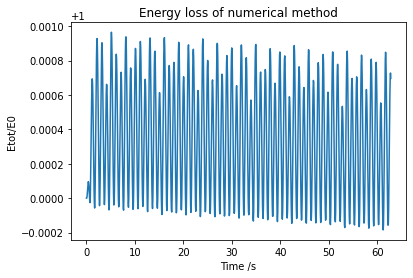

In [ ]:
plt.plot(t[:1000], E_frac[:1000])
plt.title("Energy loss of numerical method")
plt.xlabel("Time /s")
plt.ylabel("Etot/E0")
plt.show()

### Time period against $\theta_0$

Used the estimate of the time to pass through zero multiplied by four as the time period, as suggested in the handout.

This was done by solving for different $\theta_0$ and then finding the first time that the pendulum passed through zero and then taking an average of the last time before zero and the first time after it. 

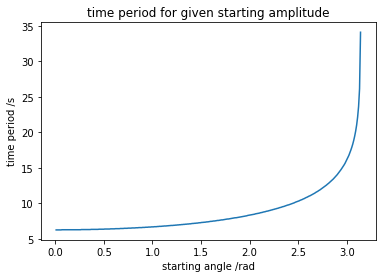

In [ ]:
# first lets define variables and the range of starting amplitudes
n_oscillations, q, F = (
    5,
    0,
    0,
)  # need 5 natural frequency oscillations as time period grows
theta0s = np.arange(0.01, np.pi, 0.01)
period = np.zeros(theta0s.shape)

for i, theta0 in enumerate(theta0s):

    t, y0, y1 = integrate_pendulum(n_oscillations, theta0, q, F, 1000)
    first_negative = np.where(y0 < 0)[0][0]
    period[i] = 4 * (t[first_negative] + t[first_negative - 1]) / 2

    # another method is to see where it passes through zero first
    # for j in range(len(t)):

    # if y0[j] < 0:
    #   period[i] =  4 * (t[j] + t[j-1]) / 2 # ave of last point before zero and first point after
    #   break # here we break so that each amplitude only appends its first time through zero

plt.plot(theta0s, period)
plt.title("time period for given starting amplitude")
plt.ylabel("time period /s")
plt.xlabel("starting angle /rad")
plt.show()

We can look at the time period for $\theta_0 = \frac{\pi}{2} \approx 1.57$ and see that here the time period is $7.42s$

In [ ]:
index = np.where(theta0s == 1.57)

period[index]

array([7.40307291])

##Core task 1 conclusion

### Energy conservation

- Two plots showed the long and short term behaviour
  - Long term behaviour showed loss (which looks exponential) of ~10% over 10,000 oscillations
  - Short term behaviour is choppy with a downwards bias 

### Time period against $\theta_0$

- Time period increased as the starting angle was increased as was inuitively expected 
- Time period almost constant for small $\theta_0$ as the small angle approximation is SHM - SHM period independent of amplitude 
- Time period at $\frac{\pi}{2}$ is $7.4s$ which is ~$1.1s$ longer than for small angle approximation i.e. most of the period growth happens at amplitude greater than $\frac{\pi}{2}$

##Core task 2

Now we add in forcing and damping terms

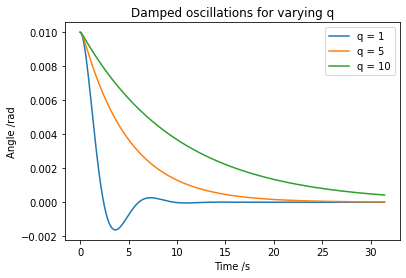

In [ ]:
n_oscillations, theta0, F = 5, 0.01, 0
qs = [1, 5, 10]

# finding the numerical solution
t, y0, y1 = integrate_pendulum(n_oscillations, theta0, q, F)

for q in qs:

    t, y0, y1 = integrate_pendulum(n_oscillations, theta0, q, F)

    plt.plot(t, y0, label=f"q = {q}")

plt.legend()
plt.title(f"Damped oscillations for varying q")
plt.ylabel("Angle /rad")
plt.xlabel("Time /s")
plt.show()

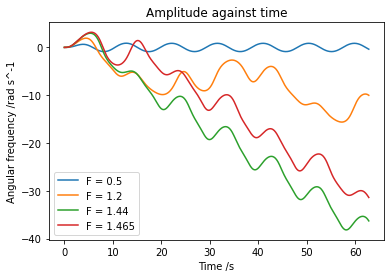

In [ ]:
n_oscillations, theta0, q = 10, 0.01, 0.5
Fs = [0.5, 1.2, 1.44, 1.465]

for F in Fs:

    t, y0, y1 = integrate_pendulum(n_oscillations, theta0, q, F)

    plt.plot(t, y0, label=f"F = {F}")


plt.title("Amplitude against time")
plt.ylabel("Angular frequency /rad s^-1")
plt.xlabel("Time /s")
plt.legend()
plt.show()

If we look at the angular velocity at ~$1000$ oscillations we get a better idea of long term periodicity 

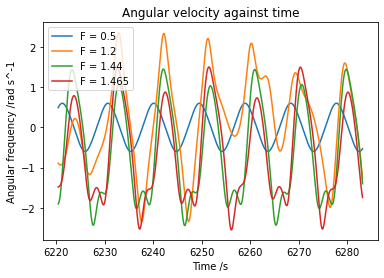

In [ ]:
# defining our variables
n_oscillations, theta0, q = 1000, 0.01, 0.5
Fs = [0.5, 1.2, 1.44, 1.465]

for F in Fs:

    t, y0, y1 = integrate_pendulum(n_oscillations, theta0, q, F)

    plt.plot(t[-1000:], y1[-1000:], label=f"F = {F}")


plt.title("Angular velocity against time")
plt.ylabel("Angular frequency /rad s^-1")
plt.xlabel("Time /s")
plt.legend()
plt.show()

##Core task 2 conclusion

- Damped undriven oscillations
  - See critical damping for $q=1$ 
  - See heavy damping for $q = 5,10$ with $q = 10$ having the long time to equilibrium as expected

- Driven damped oscillation 
  - For $F=0.5$ get stable oscillations
  - The amplitude plot gets to values $< 0$ as the pendulum goes over the top - now there is not limit in allowed amplitudes
  - For $F = 1.2, 1.44, 1.465$ get chaotic oscillations with the oscillations be much more regular for $F = 1.44, 1.465$ than $F = 1.2$ 

##Supplementary task 1 
Investigate the choatic behaviour seen via sensitive dependence to initial conditions.

How the long term behaviour depends changes for $F = 1.2$ with $\theta_0 = 0.2$ and $\theta_0 =0.20001$?

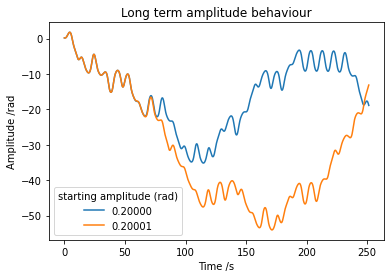

In [ ]:
# defining our variables
n_oscillations, q, F = 40, 0.5, 1.2
theta0_1, theta0_2 = 0.20000, 0.20001

# finding the solutions to the two equations
t_1, y0_1, y1_1 = integrate_pendulum(n_oscillations, theta0_1, q, F)
t_2, y0_2, y1_2 = integrate_pendulum(n_oscillations, theta0_2, q, F)

plt.plot(t_1, y0_1, label="0.20000")
plt.plot(t_2, y0_2, label="0.20001")
plt.title("Long term amplitude behaviour")
plt.ylabel("Amplitude /rad")
plt.xlabel("Time /s")
plt.legend(title="starting amplitude (rad)")
plt.show()

We can zoom in to see the point when the amplitudes start to vary by lots 

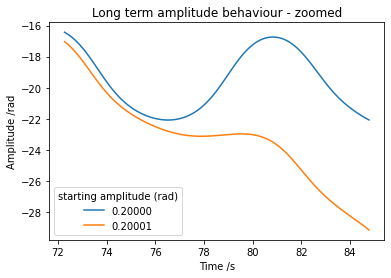

In [ ]:
plt.plot(t_1[1150:1350], y0_1[1150:1350], label="0.20000")
plt.plot(t_2[1150:1350], y0_2[1150:1350], label="0.20001")
plt.title("Long term amplitude behaviour - zoomed")
plt.xlabel("Time /s")
plt.ylabel("Amplitude /rad")
plt.legend(title="starting amplitude (rad)")
plt.show()

##Supplementary task 1 conclusion
- We can see that if two amplitudes are close at some time, this is not indicative of them being close and some arbitrary time in the future
- The second graph shows the main divergence where the blue line manages to make it over the top of the pendulum but the orange doesn't 

##Supplementary task 2 

Investigate $\theta$ against $\dot{\theta}$ to compare various bahviour in different regimes: look at SHM and chaotic regions

Lets first look at free SHM with $ F = q = 0$

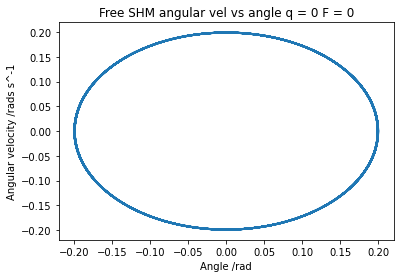

In [ ]:
t, y0, y1 = integrate_pendulum(40, 0.2, 0, 0)
plt.plot(y0, y1)
plt.title("Free SHM angular vel vs angle q = 0 F = 0")
plt.xlabel("Angle /rad")
plt.ylabel("Angular velocity /rads s^-1")
plt.show()

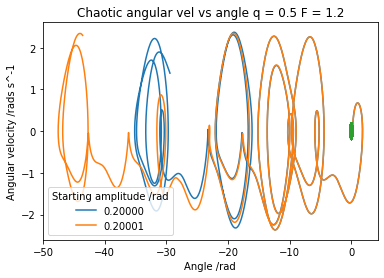

In [ ]:
plt.plot(y0_1[:2000], y1_1[:2000], label="0.20000")
plt.plot(y0_2[:2000], y1_2[:2000], label="0.20001")
plt.plot(y0, y1)
plt.title("Chaotic angular vel vs angle q = 0.5 F = 1.2")
plt.xlabel("Angle /rad")
plt.ylabel("Angular velocity /rads s^-1")
plt.legend(title="Starting amplitude /rad")
plt.show()

## Supplementary task 2 conclusion
- We see that free SHM sketches a stable circle in phase space
- For the chaotic regime seen in supplementary task 1 we can see how unpredictable the behaviour is
- The small green circle at $(0,0)$ is free SHM, this illustrate how much more of phase space chaotic solutions can 'explore'